In [7]:
import pandas as pd
essays = pd.read_csv('trained.csv')
essays.set_index('essay_id',inplace=True, drop=True)

def newCols(essays):
    correctNew = []
    misspeltNew = []
    nounsNew = []
    verbsNew = []
    adverbsNew = []
    adjectivesNew = []
    for index,essay in essays.iterrows():
        correctNew.append(essay.correct/essay.length*100)
        misspeltNew.append(essay.misspelt/essay.length*100)
        nounsNew.append(essay.nouns/essay.length*100)
        verbsNew.append(essay.adverbs/essay.length*100)
        adverbsNew.append(essay.adverbs/essay.length*100)
        adjectivesNew.append(essay.adjectives/essay.length*100)
    essays = essays.assign(correctN = correctNew)
    essays = essays.assign(misspeltN = misspeltNew)
    essays = essays.assign(nounsN = nounsNew)
    essays = essays.assign(verbsN = verbsNew)
    essays = essays.assign(adverbsN = adverbsNew)
    essays = essays.assign(adjectivesN = adjectivesNew)
    return essays
essays = newCols(essays)
essays.head()
X = essays.drop(['domain1_score','essay','essay_set','normal_score','misspelt','correct','nouns','verbs','adverbs','adjectives'], axis=1)
y = essays['normal_score']
X.head()

,length,lexical_diversity,n_sentences,wordnetscore,correctN,misspeltN,nounsN,verbsN,adverbsN,adjectivesN
essay_id,,,,,,,,,,
14834,123,1.37,9,3,94.308943,4.878049,22.764228,6.504065,6.504065,8.130081
14835,180,1.55,10,6,93.888889,6.111111,22.777778,6.666667,6.666667,7.777778
14836,169,1.62,9,24,96.449704,1.775148,23.076923,5.917160,5.917160,5.325444
14837,199,1.69,11,4,87.939698,9.045226,17.587940,3.517588,3.517588,2.010050
14838,162,1.74,11,8,97.530864,2.469136,21.604938,4.938272,4.938272,9.259259


In [29]:
normalized_X=(X-X.min())/(X.max()-X.min())
from sklearn.preprocessing import StandardScaler
col_to_std = ['length','lexical_diversity','n_sentences','wordnetscore','correctN','misspeltN','nounsN','verbsN','adverbsN','adjectivesN']
X[col_to_std] = StandardScaler().fit_transform(X[col_to_std])
X.head()

,length,lexical_diversity,n_sentences,wordnetscore,correctN,misspeltN,nounsN,verbsN,adverbsN,adjectivesN
essay_id,,,,,,,,,,
14834,-0.564170,-1.139380,0.043467,-1.033892,0.507557,-0.498194,0.140759,0.499554,0.499554,0.732825
14835,0.447114,-0.200283,0.332181,0.012597,0.397134,-0.155581,0.144711,0.574577,0.574577,0.580263
14836,0.251954,0.164922,0.043467,6.291528,1.070317,-1.360350,0.231964,0.228764,0.228764,-0.481705
14837,0.784208,0.530126,0.620895,-0.685062,-1.166780,0.659678,-1.369028,-0.878365,-0.878365,-1.917415
14838,0.127761,0.790986,0.620895,0.710256,1.354531,-1.167522,-0.197375,-0.222881,-0.222881,1.221809


In [18]:
normalized_X.corr()

,length,lexical_diversity,n_sentences,wordnetscore,correctN,misspeltN,nounsN,verbsN,adverbsN,adjectivesN
length,1.000000,0.704630,0.784995,0.600038,-0.116262,0.108707,0.022393,0.048700,0.048700,0.044306
lexical_diversity,0.704630,1.000000,0.505644,0.394189,0.044281,-0.057293,0.044152,-0.190167,-0.190167,-0.219457
n_sentences,0.784995,0.505644,1.000000,0.466756,-0.167746,0.163243,0.003968,0.095274,0.095274,0.090742
wordnetscore,0.600038,0.394189,0.466756,1.000000,0.037196,-0.025936,0.021304,0.132317,0.132317,0.056399
correctN,-0.116262,0.044281,-0.167746,0.037196,1.000000,-0.955984,-0.045721,0.016804,0.016804,-0.075020
misspeltN,0.108707,-0.057293,0.163243,-0.025936,-0.955984,1.000000,0.031232,0.019553,0.019553,0.105793
nounsN,0.022393,0.044152,0.003968,0.021304,-0.045721,0.031232,1.000000,-0.303579,-0.303579,-0.095574
verbsN,0.048700,-0.190167,0.095274,0.132317,0.016804,0.019553,-0.303579,1.000000,1.000000,0.228514
adverbsN,0.048700,-0.190167,0.095274,0.132317,0.016804,0.019553,-0.303579,1.000000,1.000000,0.228514
adjectivesN,0.044306,-0.219457,0.090742,0.056399,-0.075020,0.105793,-0.095574,0.228514,0.228514,1.000000


In [19]:
from sklearn.model_selection import train_test_split
# Split X and y into X_
n_X_train, n_X_test, n_y_train, n_y_test = train_test_split(normalized_X, y, test_size=0.2, random_state=1)

from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(n_X_train, n_y_train)


LinearRegression()

In [20]:
regression_model.coef_

array([ 3.69293551, -0.40793348,  0.44695263,  2.51322157,  3.3054924 ,
        2.57487967,  1.58292482,  0.34557344,  0.34557344,  1.23970997])

In [22]:
from sklearn.metrics import r2_score,accuracy_score
print(regression_model.score(n_X_test, n_y_test))
y_pred = regression_model.predict(n_X_test)

0.5541919471699364


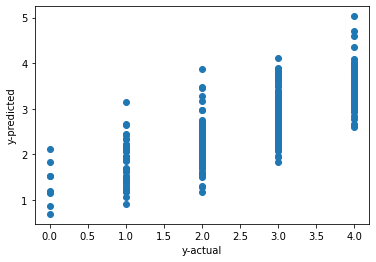

In [39]:
from matplotlib import pyplot as plt
plt.scatter(n_y_test,y_pred)
plt.xlabel('y-actual')
plt.ylabel('y-predicted')
plt.show()

In [24]:
from sklearn.preprocessing import PolynomialFeatures
for val in range(1,6):
    poly_reg = PolynomialFeatures(degree=val)
    X_poly = poly_reg.fit_transform(n_X_train)
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, n_y_train)
    y_predict = pol_reg.predict(poly_reg.transform(n_X_test))
    print("rmse = {}",math.sqrt(mean_squared_error(y_predict, n_y_test)))
    print("r2_score = {}",r2_score(n_y_test,y_predict))

rmse = {} 0.6479748302369932
r2_score = {} 0.5541919471699365
rmse = {} 0.622060032898186
r2_score = {} 0.5891377558987688
rmse = {} 0.7503098573068824
r2_score = {} 0.4022591454730877
rmse = {} 7.460254737946227
r2_score = {} -58.09339618101234
rmse = {} 206.14570218479375
r2_score = {} -45120.15474842138


In [43]:
from sklearn.model_selection import train_test_split

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


In [44]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [32]:
regression_model.intercept_

2.7276764202821226

In [33]:
regression_model.coef_

array([ 0.45249701, -0.05392417,  0.07036734,  0.30019698,  0.28291999,
        0.24711972,  0.11554341,  0.04244274,  0.04244274,  0.0858835 ])

In [45]:
from sklearn.metrics import r2_score,accuracy_score
print(regression_model.score(X_test, y_test))
y_pred = regression_model.predict(X_test)

0.5495279120543642


In [35]:
from sklearn.metrics import mean_squared_error

y_predict = regression_model.predict(X_test)

regression_model_mse = mean_squared_error(y_predict, y_test)

regression_model_mse
import math

math.sqrt(regression_model_mse)

0.6479748302369933

In [12]:
from sklearn.preprocessing import PolynomialFeatures
for val in range(1,10):
    poly_reg = PolynomialFeatures(degree=val)
    X_poly = poly_reg.fit_transform(X)
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, y)
    y_predict = pol_reg.predict(X_poly)
    print("rmse = {}",math.sqrt(mean_squared_error(y_predict, y)))
    print("r2_score = {}",r2_score(y,y_predict))

rmse = {} 0.6306914822024646
r2_score = {} 0.5775576192409284
rmse = {} 0.5916091127038631
r2_score = {} 0.6282908429967584
rmse = {} 0.5599185349430765
r2_score = {} 0.6670467653220038
rmse = {} 0.45790600811189314
r2_score = {} 0.7773174253770506
rmse = {} 0.07276465032099905
r2_score = {} 0.994376917654697
rmse = {} 0.005536705011815039
r2_score = {} 0.9999674436040911
rmse = {} 0.01099655740002152
r2_score = {} 0.9998715757490952
rmse = {} 0.010830575662900015
r2_score = {} 0.9998754233547262
rmse = {} 0.019829554872429184
r2_score = {} 0.9995824009702223


In [36]:
for val in range(1,10):
    poly_reg = PolynomialFeatures(degree=val)
    X_poly = poly_reg.fit_transform(X_train)
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, y_train)
    y_predict = pol_reg.predict(poly_reg.transform(X_test))
    print("rmse = {}",math.sqrt(mean_squared_error(y_predict, y_test)))
    print("r2_score = {}",r2_score(y_test,y_predict))

rmse = {} 0.6479748302369933
r2_score = {} 0.5541919471699362
rmse = {} 0.6213099581088788
r2_score = {} 0.5901279870533731
rmse = {} 0.750309857306848
r2_score = {} 0.4022591454731427
rmse = {} 7.5425161643890295
r2_score = {} -59.403782497731
rmse = {} 274.90072371708584
r2_score = {} -80237.61104262668
rmse = {} 2313.5611316403106
r2_score = {} -5683207.571479998
rmse = {} 2853.959339945022
r2_score = {} -8648228.356563177
rmse = {} 58674.84588876458
r2_score = {} -3655405415.9515615
rmse = {} 60677.866523718694
r2_score = {} -3909239158.174019


In [14]:
X.corr()

,length,lexical_diversity,n_sentences,wordnetscore,correctN,misspeltN,nounsN,verbsN,adverbsN,adjectivesN
length,1.000000,0.704630,0.784995,0.600038,-0.116262,0.108707,0.022393,0.048700,0.048700,0.044306
lexical_diversity,0.704630,1.000000,0.505644,0.394189,0.044281,-0.057293,0.044152,-0.190167,-0.190167,-0.219457
n_sentences,0.784995,0.505644,1.000000,0.466756,-0.167746,0.163243,0.003968,0.095274,0.095274,0.090742
wordnetscore,0.600038,0.394189,0.466756,1.000000,0.037196,-0.025936,0.021304,0.132317,0.132317,0.056399
correctN,-0.116262,0.044281,-0.167746,0.037196,1.000000,-0.955984,-0.045721,0.016804,0.016804,-0.075020
misspeltN,0.108707,-0.057293,0.163243,-0.025936,-0.955984,1.000000,0.031232,0.019553,0.019553,0.105793
nounsN,0.022393,0.044152,0.003968,0.021304,-0.045721,0.031232,1.000000,-0.303579,-0.303579,-0.095574
verbsN,0.048700,-0.190167,0.095274,0.132317,0.016804,0.019553,-0.303579,1.000000,1.000000,0.228514
adverbsN,0.048700,-0.190167,0.095274,0.132317,0.016804,0.019553,-0.303579,1.000000,1.000000,0.228514
adjectivesN,0.044306,-0.219457,0.090742,0.056399,-0.075020,0.105793,-0.095574,0.228514,0.228514,1.000000
